<a href="https://colab.research.google.com/github/saurabhshinkar/Play_Store_App_Review_Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing Dataset
play_store_data= pd.read_csv('/content/drive/MyDrive/Capstone Projects/EDA project/Play Store Data.csv')


In [6]:
# First Look

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
play_store_data.shape

(10841, 13)

In [8]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
play_store_data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Missing Value Count Function
def show_missing():
    missing = play_store_data.columns[play_store_data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False)/len(play_store_data)*100,2))

Missing Data Count
Rating            1474
Current Ver       8   
Android Ver       3   
Type              1   
Content Rating    1   
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Rating            13.60
Current Ver       0.07 
Android Ver       0.03 
Type              0.01 
Content Rating    0.01 
dtype: float64


In [ ]:
play_store_data[play_store_data['Rating'].isnull()]

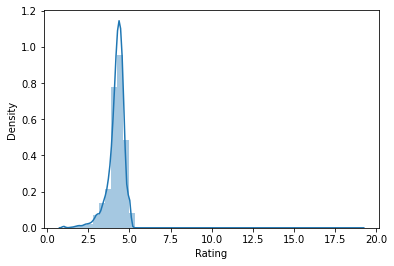

In [12]:
sns.distplot(play_store_data.Rating.dropna())

In [13]:
play_store_data['Rating'].median()

4.3

In [14]:
#Method 1: Fill NaN Values in One Column with Median

play_store_data['Rating'] = play_store_data['Rating'].fillna(play_store_data['Rating'].median())

In [15]:
# Missing Value Count Function
def show_missing():
    missing = play_store_data.columns[play_store_data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(play_store_data[show_missing()].isnull().sum().sort_values(ascending = False)/len(play_store_data)*100,2))

Missing Data Count
Current Ver       8
Android Ver       3
Type              1
Content Rating    1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Current Ver       0.07
Android Ver       0.03
Type              0.01
Content Rating    0.01
dtype: float64


In [16]:
play_store_data.dropna(inplace=True)

In [17]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [18]:
play_store_data['Installs'].dtype

dtype('O')

In [19]:
type(play_store_data.Installs.iloc[0][0])

str

In [20]:
play_store_data['Installs'].value_counts()

1,000,000+        1578
10,000,000+       1252
100,000+          1169
10,000+           1052
1,000+            905 
5,000,000+        752 
100+              718 
500,000+          538 
50,000+           478 
5,000+            476 
100,000,000+      409 
10+               385 
500+              330 
50,000,000+       289 
50+               205 
5+                82  
500,000,000+      72  
1+                67  
1,000,000,000+    58  
0+                14  
Name: Installs, dtype: int64

In [21]:
df=play_store_data.copy()

In [22]:
df['Installs']=df['Installs'].apply(lambda x:x.replace('+',''))
df['Installs']=df['Installs'].apply(lambda x:x.replace(',',''))
df['Installs']=pd.to_numeric(df['Installs'])

In [23]:
df['Installs'].value_counts()

1000000       1578
10000000      1252
100000        1169
10000         1052
1000          905 
5000000       752 
100           718 
500000        538 
50000         478 
5000          476 
100000000     409 
10            385 
500           330 
50000000      289 
50            205 
5             82  
500000000     72  
1             67  
1000000000    58  
0             14  
Name: Installs, dtype: int64

In [24]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
df['Installs'].dtype

dtype('int64')

In [26]:
df['Price'].value_counts().head()

0        10032
$0.99    146  
$2.99    129  
$1.99    73   
$4.99    72   
Name: Price, dtype: int64

In [27]:
type(play_store_data.Price.iloc[0])

str

In [28]:
df['Price']=df['Price'].apply(lambda x:x.replace('$',''))
df['Price']=pd.to_numeric(df['Price'])

In [29]:
type(df.Price.iloc[0])

numpy.float64

In [30]:
type(df['Reviews'].iloc[0])

str

In [31]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [32]:
type(df['Reviews'].iloc[0])

numpy.int64

In [ ]:
play_store_data['Size'].value_counts()

In [34]:
df['Size'] = df['Size'].apply(lambda x: x.replace('Varies with device', 'NaN'))

In [35]:
df['Size'] =df['Size'].apply(lambda x: x.replace('M', ''))

In [36]:
df['Size'] = df['Size'].apply(lambda x: float(x.replace('k', ''))/1000 if 'k' in str(x) else x)

In [37]:
df['Size'] = df['Size'].astype(float)

In [ ]:
df['Size']

In [39]:
type(df.Size.iloc[0])

numpy.float64

In [40]:
df['Size'].value_counts().head()

11.0    197
12.0    196
14.0    193
13.0    191
15.0    184
Name: Size, dtype: int64

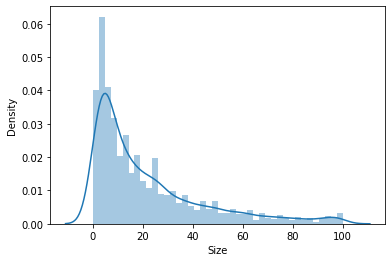

In [41]:
sns.distplot(df.Size.dropna())

In [42]:
df['Size'].median()

13.0

In [43]:
df['Size'].isna().sum()

1694

In [44]:
df['Size'] = df['Size'].fillna(df['Size'].median())

In [45]:
df['Size'].isna().sum()

0

In [46]:
df['Size'].median()

13.0

In [47]:
df.isna().any().any()

False

In [48]:
df['App'].value_counts().max()

9

In [49]:
df['App'].value_counts().reset_index().head()

,index,App
0,ROBLOX,9
1,"CBS Sports App - Scores, News, Stats & Watch Live",8
2,Candy Crush Saga,7
3,8 Ball Pool,7
4,ESPN,7


In [50]:
df[df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [51]:
df.drop_duplicates(subset=['App'],inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [53]:
df['App'].value_counts().head()

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
Name: App, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [55]:
top_genres = df.Genres.value_counts().reset_index().head(10)

In [56]:
top_genres.rename(columns={'Genres':'Count','index':'Genres'},inplace=True)

In [57]:
top_genres

,Genres,Count
0,Tools,824
1,Entertainment,560
2,Education,509
3,Business,420
4,Medical,395
5,Productivity,374
6,Personalization,374
7,Lifestyle,368
8,Finance,345
9,Sports,331


In [58]:
genres_installs = df.groupby('Genres')['Installs'].sum().reset_index()

In [59]:
genres_installs.head()

,Genres,Installs
0,Action,3483039190
1,Action;Action & Adventure,53020500
2,Adventure,296695320
3,Adventure;Action & Adventure,106150000
4,Adventure;Brain Games,100000


In [60]:
top_genres_installs = pd.merge(top_genres, genres_installs,how='inner',on='Genres')

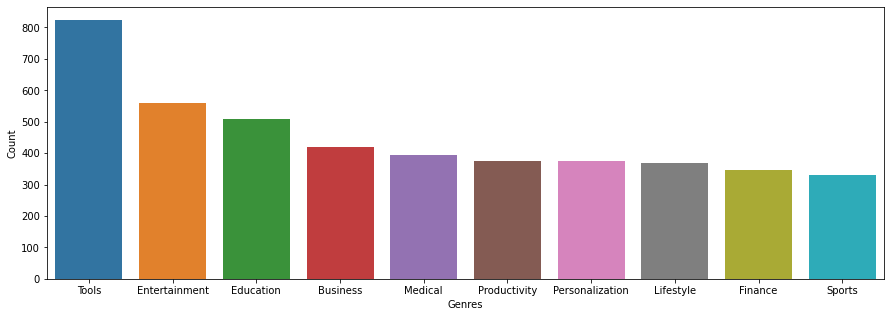

In [81]:

plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(top_genres_installs['Genres'], top_genres_installs['Count'])

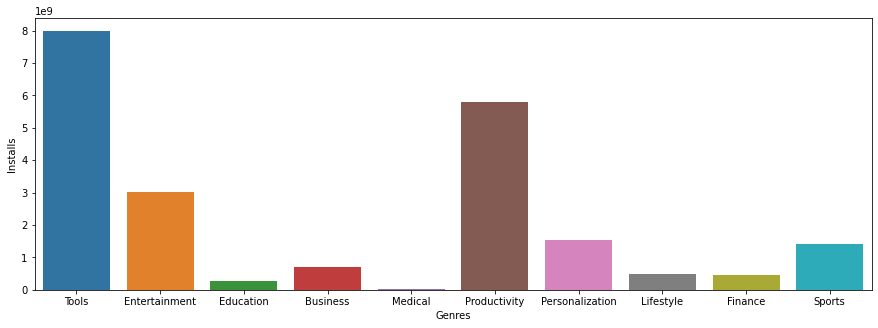

In [82]:
sns.barplot(top_genres_installs['Genres'], top_genres_installs['Installs'])

In [83]:
top_categories = df['Category'].value_counts().reset_index().head(20)

In [84]:
top_categories.rename(columns={'Category':'Count','index':'Category'},inplace=True)

In [86]:
top_categories

,Category,Count
0,FAMILY,1828
1,GAME,959
2,TOOLS,825
3,BUSINESS,420
4,MEDICAL,395
5,PRODUCTIVITY,374
6,PERSONALIZATION,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [85]:
category_installs = df.groupby('Category')['Installs'].sum().reset_index()

In [89]:
category_installs

,Category,Installs
0,ART_AND_DESIGN,114333100
1,AUTO_AND_VEHICLES,53130211
2,BEAUTY,27197050
3,BOOKS_AND_REFERENCE,1665968576
4,BUSINESS,697164865
5,COMICS,44981150
6,COMMUNICATION,11038276251
7,DATING,140926107
8,EDUCATION,352952000
9,ENTERTAINMENT,2113660000


In [94]:
top_category_installs = pd.merge(top_categories, category_installs,how='inner',on='Category').head(15)

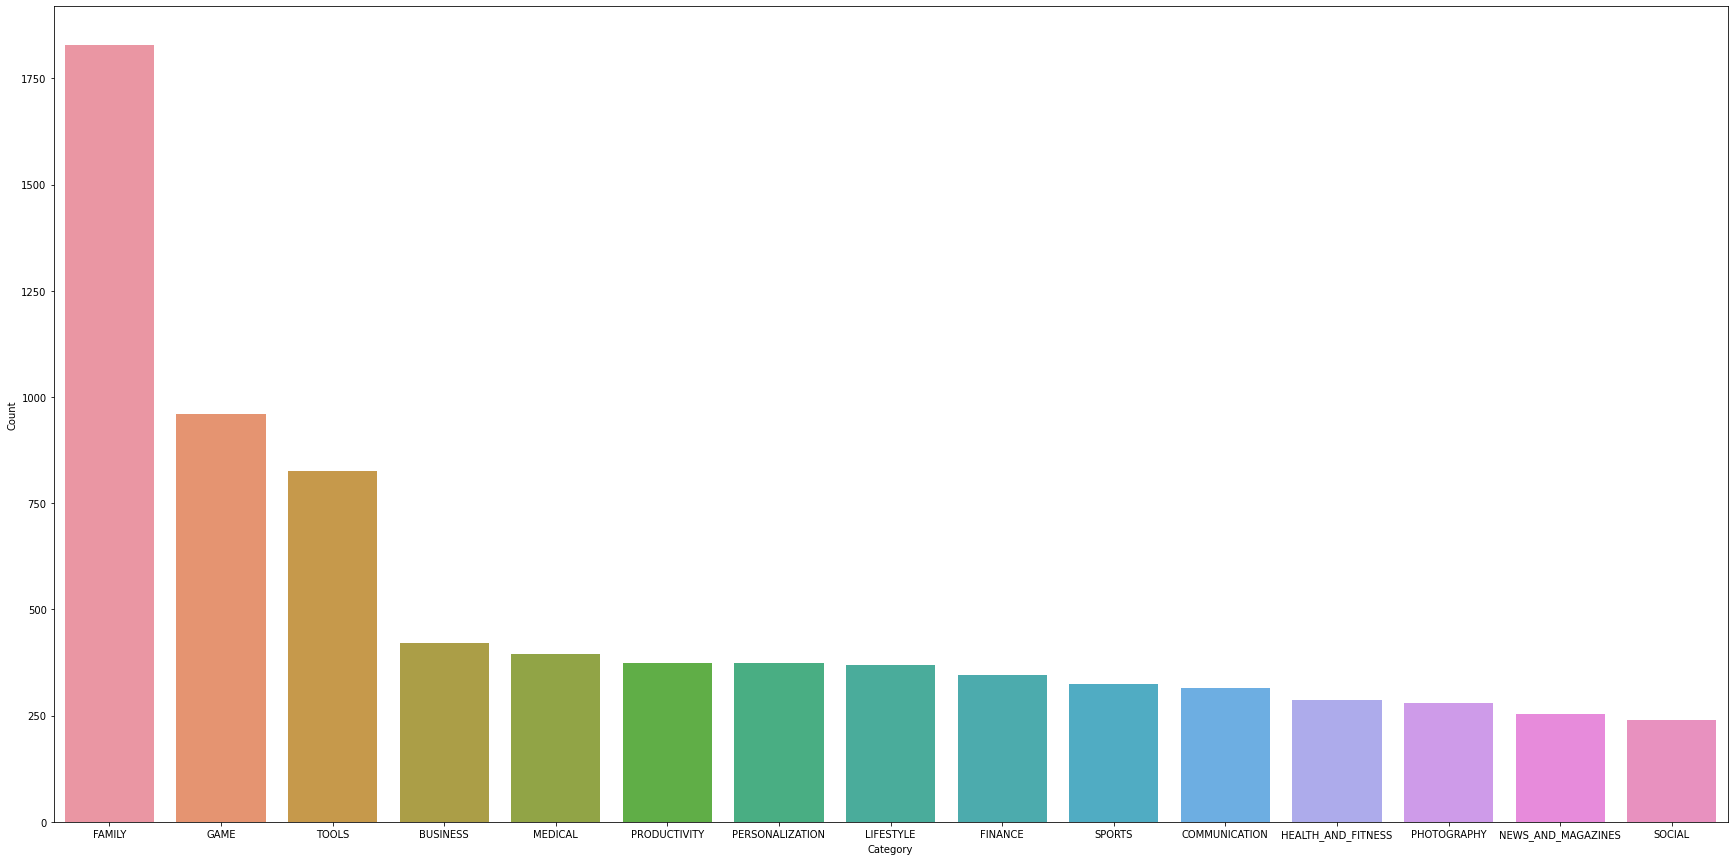

In [95]:
plt.rcParams['figure.figsize'] = (30, 15)
sns.barplot(top_category_installs['Category'], top_category_installs['Count'])

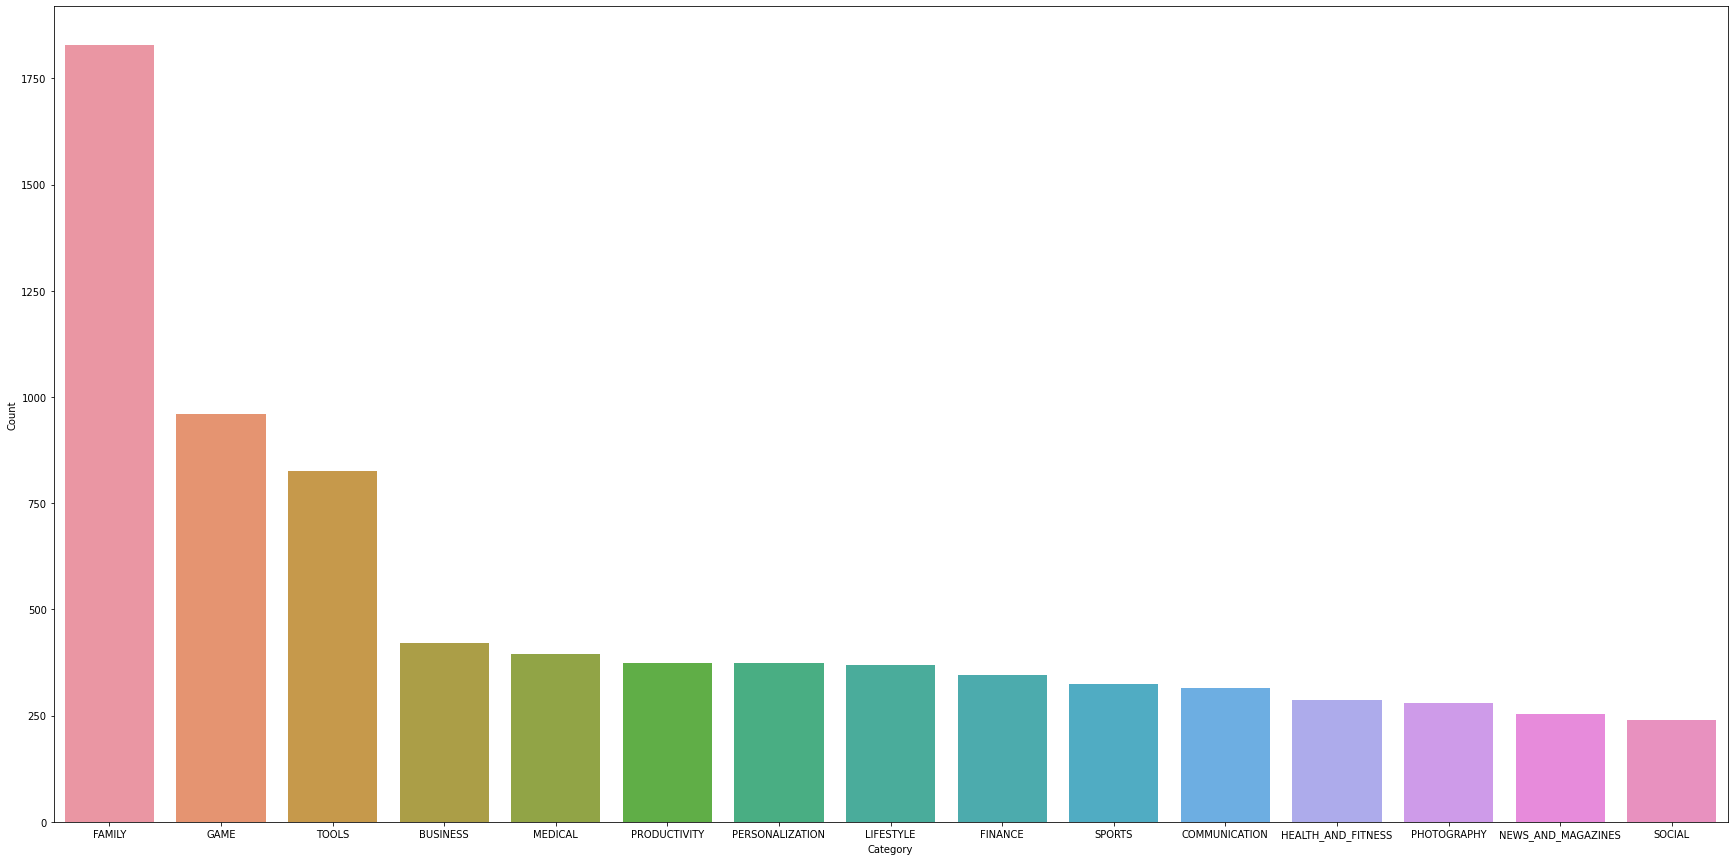

In [96]:
sns.barplot(top_category_installs['Category'], top_category_installs['Count'])

In [99]:
genres_ratings_play_store_data = df.groupby(['Genres'])[['Rating']].mean()
genres_ratings_play_store_data.head()

,Rating
Genres,
Action,4.246154
Action;Action & Adventure,4.316667
Adventure,4.182192
Adventure;Action & Adventure,4.300000
Adventure;Brain Games,4.600000


In [100]:
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_play_store_data , on='Genres')
genres_installs_ratings

,Genres,Count,Installs,Rating
0,Tools,824,7991271905,4.072937
1,Entertainment,560,3014704684,4.117857
2,Education,509,258410048,4.292731
3,Business,420,697164865,4.173810
4,Medical,395,38193177,4.202025
5,Productivity,374,5793091369,4.206150
6,Personalization,374,1532483782,4.324866
7,Lifestyle,368,493823539,4.131793
8,Finance,345,455348734,4.138551
9,Sports,331,1412474498,4.238369


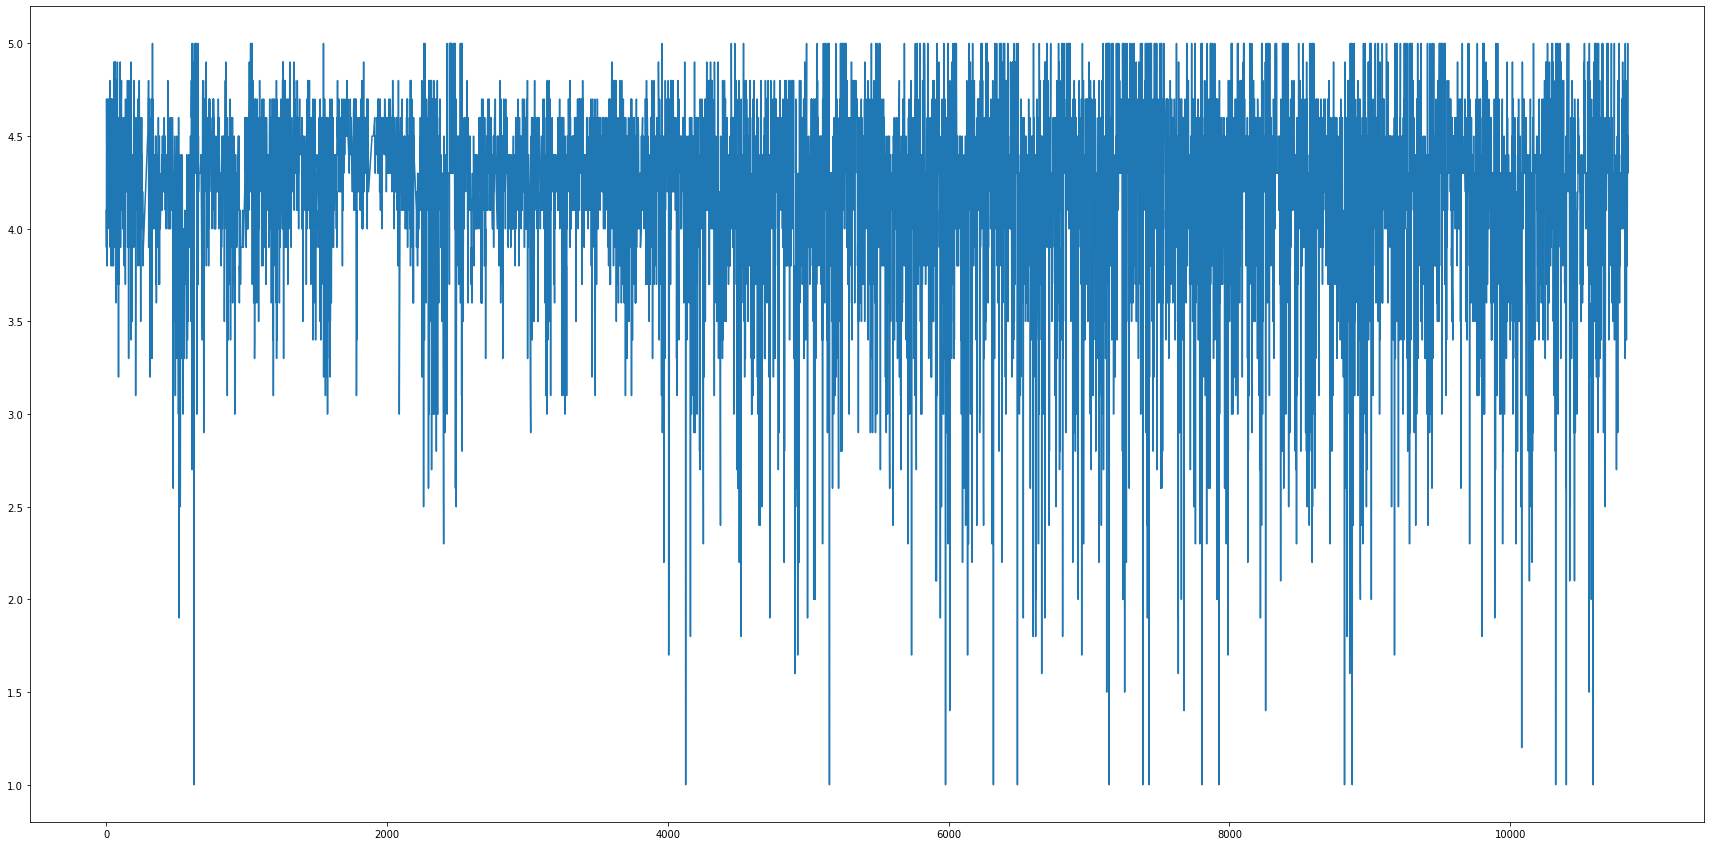

In [101]:
df['Rating'].plot ()

In [105]:
genres_ratings_play_store_data['Rating'].describe()

count    118.000000
mean     4.258810  
std      0.169903  
min      3.800000  
25%      4.155364  
50%      4.260948  
75%      4.339783  
max      4.800000  
Name: Rating, dtype: float64

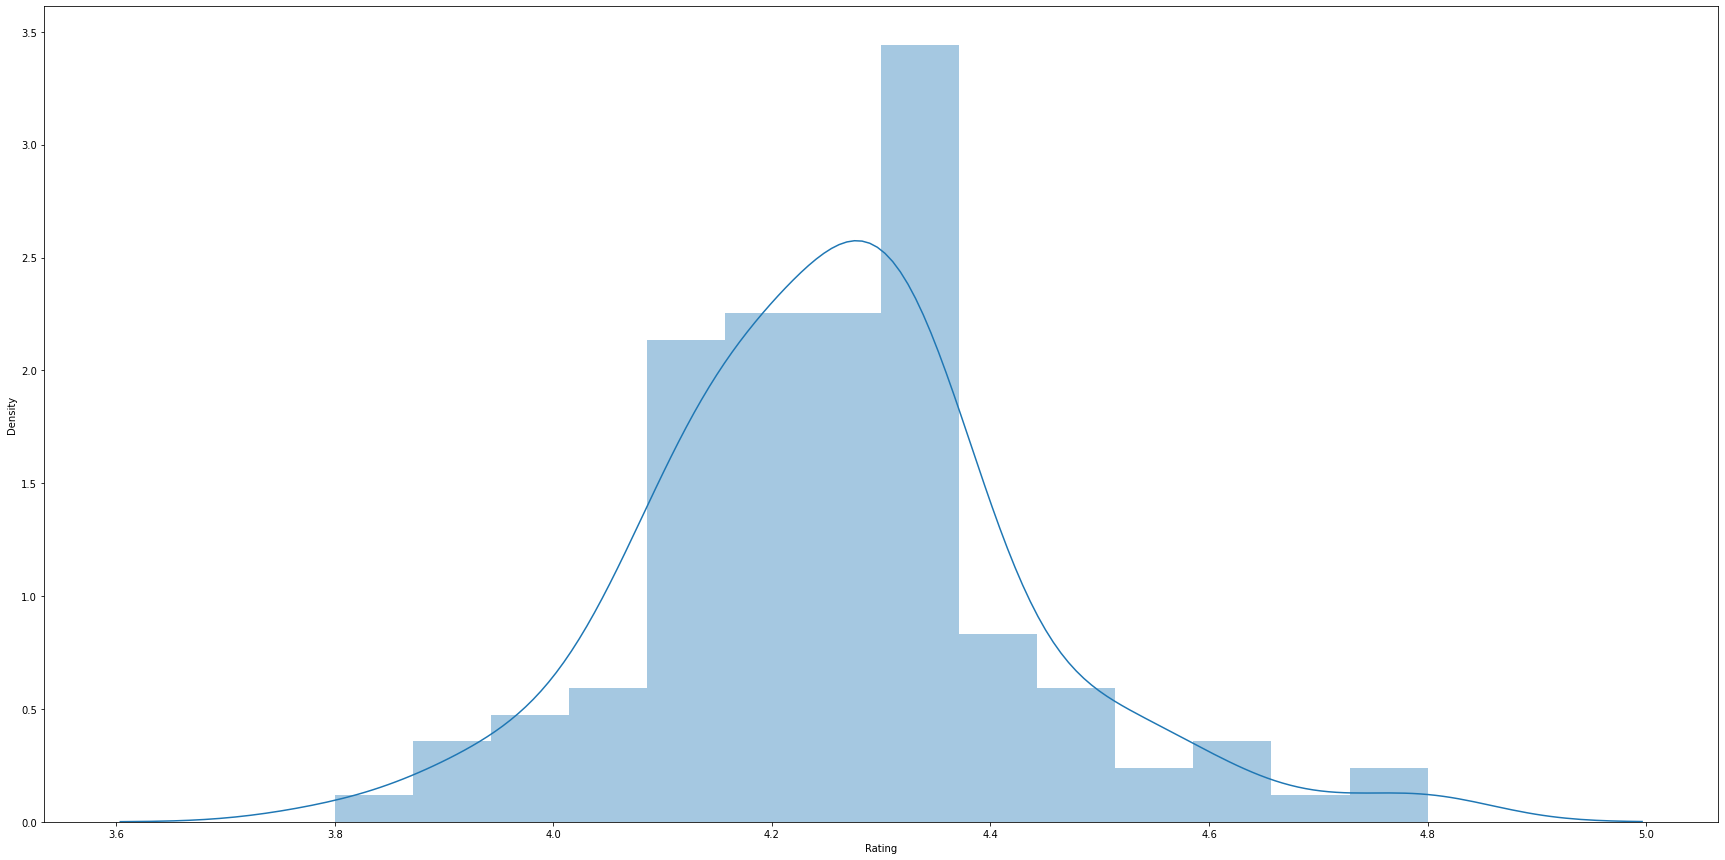

In [106]:
sns.distplot(genres_ratings_play_store_data['Rating'])

In [107]:
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)

In [111]:
genres_installs_ratings

,Genres,Count,Installs,Rating
6,Personalization,374,1532483782,4.324866
2,Education,509,258410048,4.292731
9,Sports,331,1412474498,4.238369
5,Productivity,374,5793091369,4.206150
4,Medical,395,38193177,4.202025
3,Business,420,697164865,4.173810
8,Finance,345,455348734,4.138551
7,Lifestyle,368,493823539,4.131793
1,Entertainment,560,3014704684,4.117857
0,Tools,824,7991271905,4.072937


In [108]:
highest_rated_genres = genres_installs_ratings.iloc[0:20]
lowest_rated_genres = genres_installs_ratings.iloc[-20:]

In [109]:
highest_rated_genres

,Genres,Count,Installs,Rating
6,Personalization,374,1532483782,4.324866
2,Education,509,258410048,4.292731
9,Sports,331,1412474498,4.238369
5,Productivity,374,5793091369,4.206150
4,Medical,395,38193177,4.202025
3,Business,420,697164865,4.173810
8,Finance,345,455348734,4.138551
7,Lifestyle,368,493823539,4.131793
1,Entertainment,560,3014704684,4.117857
0,Tools,824,7991271905,4.072937


In [113]:
#lowest_rated_genres..do later as data needs to taken well

In [114]:
app_count = df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
app_count

,Category,Type,Count
0,ART_AND_DESIGN,Free,60
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
5,BOOKS_AND_REFERENCE,Free,193
6,BOOKS_AND_REFERENCE,Paid,28
7,BUSINESS,Free,408
8,BUSINESS,Paid,12
9,COMICS,Free,56


In [116]:
#pivot part not done,that graph can be draw using upstack

In [118]:
categoty_type_installs = df.groupby(['Category','Type'])[['Installs']].sum().reset_index()
categoty_type_installs

,Category,Type,Installs
0,ART_AND_DESIGN,Free,114317100
1,ART_AND_DESIGN,Paid,16000
2,AUTO_AND_VEHICLES,Free,53080061
3,AUTO_AND_VEHICLES,Paid,50150
4,BEAUTY,Free,27197050
5,BOOKS_AND_REFERENCE,Free,1665945260
6,BOOKS_AND_REFERENCE,Paid,23316
7,BUSINESS,Free,696952090
8,BUSINESS,Paid,212775
9,COMICS,Free,44981150


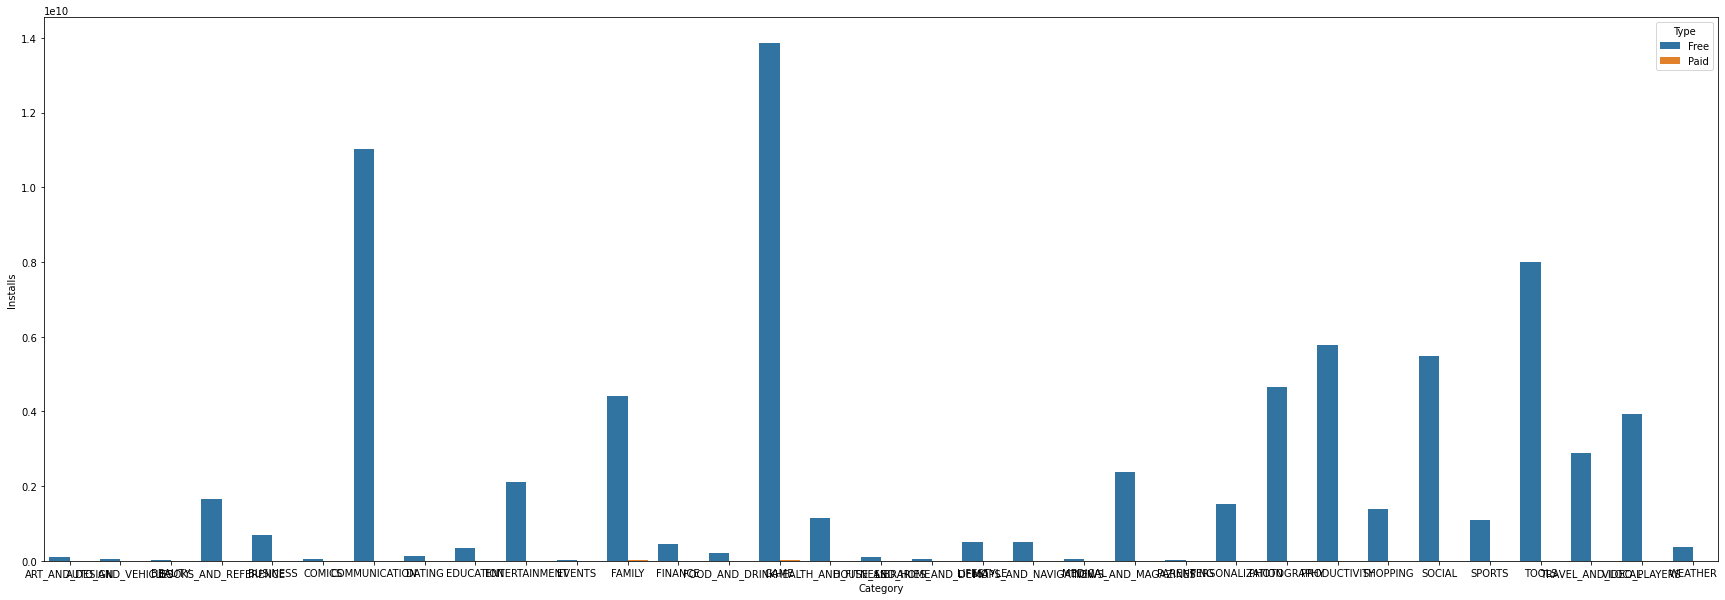

In [128]:
plt.rcParams['figure.figsize'] = (30, 10)
sns.barplot(categoty_type_installs['Category'],categoty_type_installs['Installs'],hue=categoty_type_installs['Type']);
plt.show()

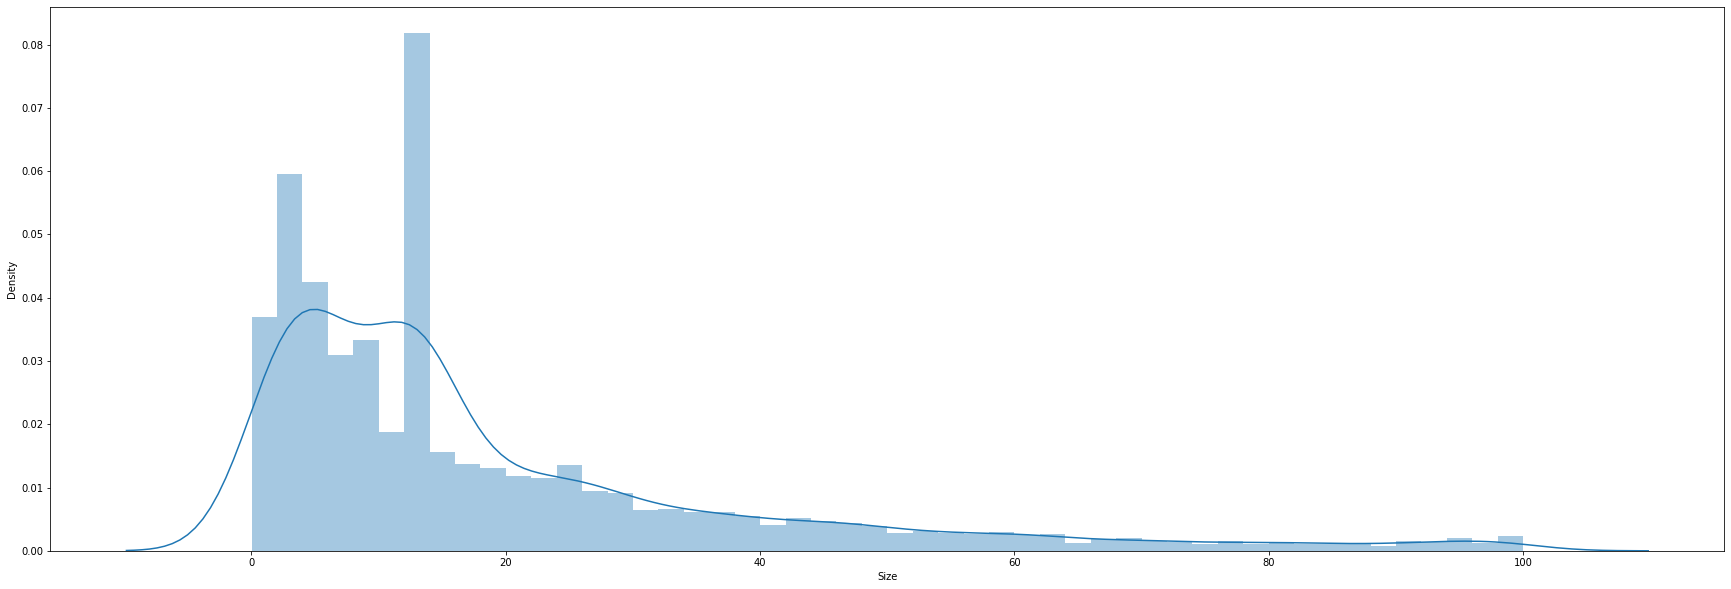

In [130]:
sns.distplot(df['Size'])

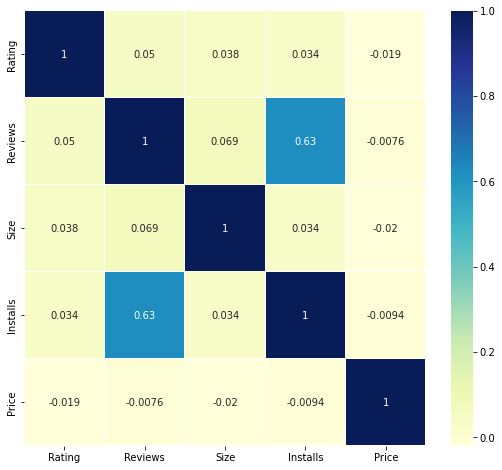

In [132]:
corrmat = df.corr()  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax,cmap ="YlGnBu",annot = True, linewidths = 0.1)

In [134]:
df.Category.value_counts()

FAMILY                 1828
GAME                   959 
TOOLS                  825 
BUSINESS               420 
MEDICAL                395 
PRODUCTIVITY           374 
PERSONALIZATION        374 
LIFESTYLE              369 
FINANCE                345 
SPORTS                 325 
COMMUNICATION          315 
HEALTH_AND_FITNESS     288 
PHOTOGRAPHY            281 
NEWS_AND_MAGAZINES     254 
SOCIAL                 239 
BOOKS_AND_REFERENCE    221 
TRAVEL_AND_LOCAL       219 
SHOPPING               202 
DATING                 171 
VIDEO_PLAYERS          163 
MAPS_AND_NAVIGATION    131 
EDUCATION              119 
FOOD_AND_DRINK         112 
ENTERTAINMENT          102 
AUTO_AND_VEHICLES      85  
LIBRARIES_AND_DEMO     83  
WEATHER                79  
HOUSE_AND_HOME         74  
EVENTS                 64  
ART_AND_DESIGN         63  
PARENTING              60  
COMICS                 56  
BEAUTY                 53  
Name: Category, dtype: int64

In [ ]:
#new data merge now

How size impacting no of installs remain